# Student Performance Dataset

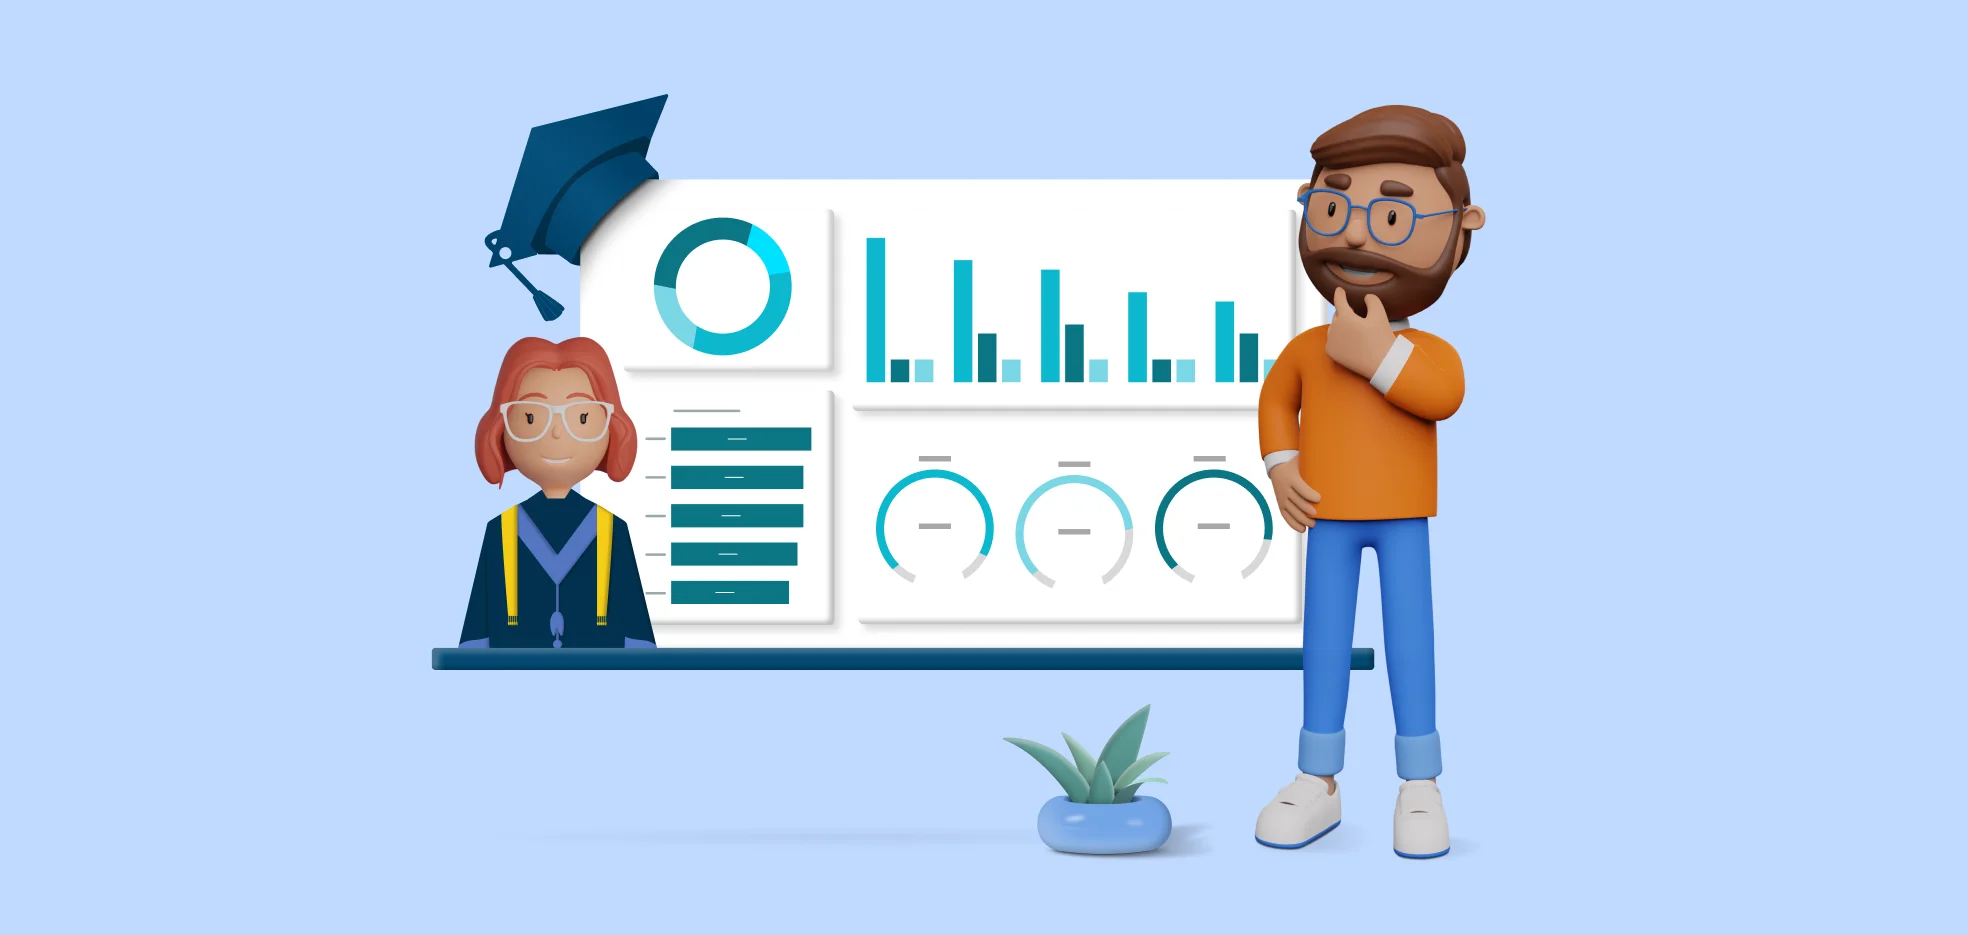

## **Source:**
https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
## **Objective:**
Identify key factors influencing student academic performance
## **Dataset Overview**  
This dataset contains student performance data based on gender, ethnicity, parental education, lunch type, test preparation, and scores in math, reading, and writing.  

## **Dataset Columns**  
- **gender**: Student’s gender (male/female).  
- **race/ethnicity**: Student’s ethnicity group.  
- **parental level of education**: Highest education level of parents.  
- **lunch**: Type of lunch (standard/free or reduced).  
- **test preparation course**: Whether the student completed a test prep course.  
- **math score**: Score in math exam.  
- **reading score**: Score in reading exam.  
- **writing score**: Score in writing exam.  

## **Possible Use Cases**  
- Analyzing the impact of socio-economic factors on student performance.   
- Understanding correlations between different test scores.  



In [273]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
import warnings
warnings.filterwarnings('ignore')

In [274]:
#reading the dataset
data = pd.read_csv("/content/StudentsPerformance.csv")

In [275]:
#printing the dataset
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [276]:
##finding the datatypes,colums and rows /information of the data provided or summaryzing the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


From the info we can see
1. The data has 1000 rows and 8 columns
2. There are no null values but has colomn with categorial data




In [277]:
#Print the duplicated rows
data[data.duplicated()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [278]:
#Finding the unique values in colomn
data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [279]:
#Finding the counts of each value in colomn
data['parental level of education'].value_counts()

,count
parental level of education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


In [280]:
#Finding the counts of each value in colomn
data['lunch'].value_counts()

,count
lunch,
standard,645
free/reduced,355


In [281]:
data['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [282]:
#Describing the data /finding the mean,Standard deviation ,count, median for columns
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


1. From describing data we can numerical coloumns has some diff between 75%(upper quartile region) and max (outer extreme) so there might be outliers present
2. So plotting histogram and boxplot for numerical colomns for futher analysis


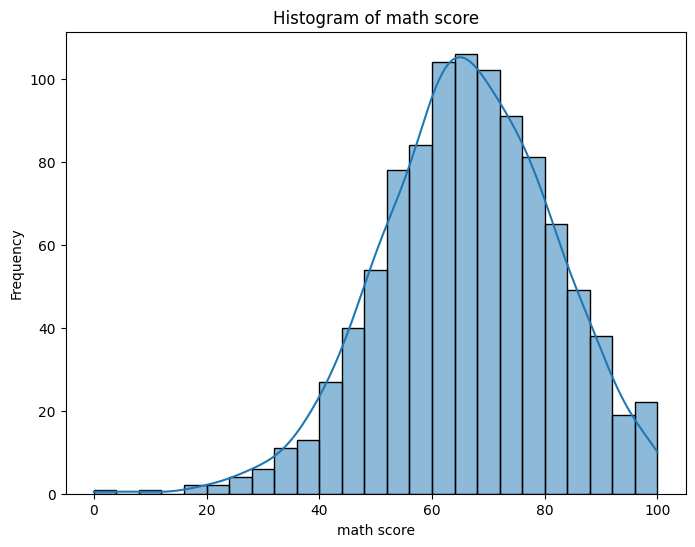

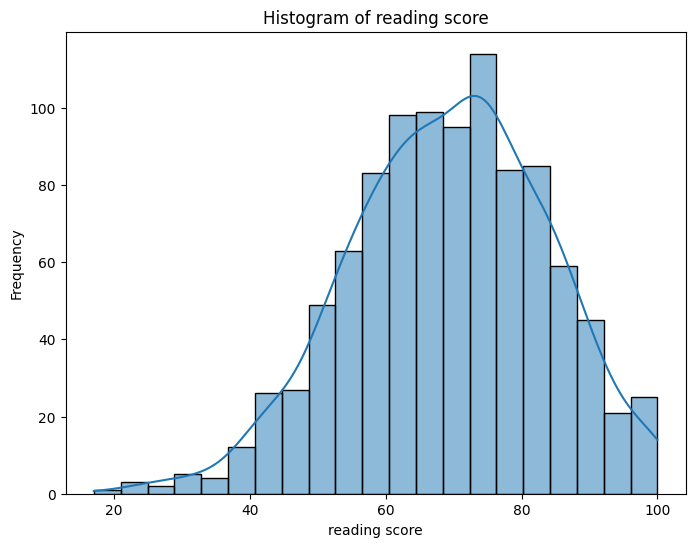

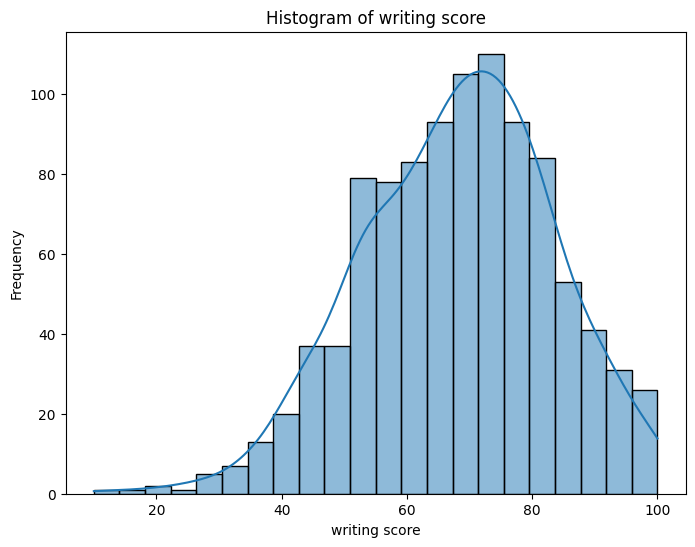

In [283]:
#Histogram for numerical colomns
for col in data.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)  # Added KDE for better visualization
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

From histogram
1. The highest match score frequency is around ~60 to 70 and it ranges from o to 100 .aand we can observe it's slightly skewed to the left at bottom tail so outliers might be present
2. The highest match score frequency is around ~75 and it ranges from 20 to 100 .and we can observe it's slightly skewed to the left and left so outliers might be present
3. The highest writing score observed is around ~75 and score ranges from ~10 to 100 ,and the plot is slightly to the left

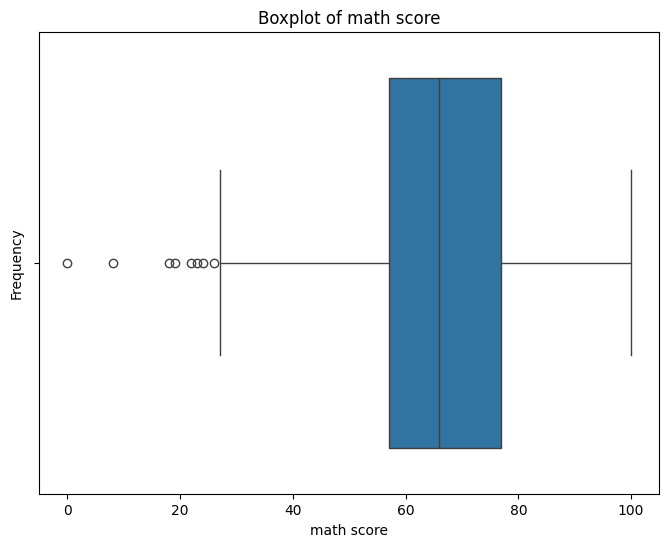

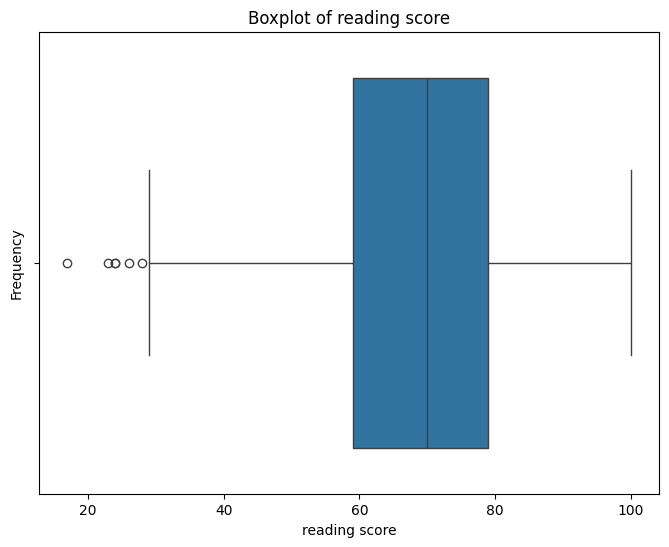

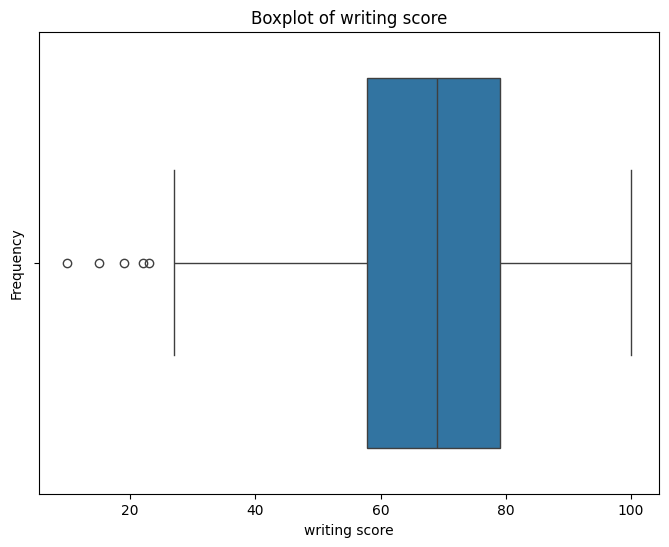

In [284]:
#boxplot for numerical colomns
for col in data.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, data=data)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

From the boxplot
1. We can observe all colomns have outlier mathscore has outliers below ~30
2. Readingscore and writing score also have outliers on the left below ~30


In [285]:
# fix and replace outliers for colomns
# Calculate the IQR for the column with function defined to handle outliers using IQR
def handle_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

# Apply outlier handling to relevant columns
for col in ['math score', 'reading score', 'writing score']:
    data = handle_outliers_iqr(data, col)


Using IQR Method to fix outliers if outliers are on the extreme points use IQR method where we subtract third quartile(75%) and first quartile(25%) to get Iqr value then calulate upperbound and lowerbound values
The IQR method is used to detect and remove outliers in a dataset. It focuses on the middle 50% of the data and filters out extreme values.

Steps to Detect Outliers Using IQR
1. Find Q1 (25th percentile) and Q3 (75th percentile)
Q1 = Lower Quartile (25% of data is below this)
Q3 = Upper Quartile (75% of data is below this)
2.  Calculate IQR:
* IQR=Q3−Q1

This gives the range of the middle 50% of values.

3. Set Outlier Boundaries:
* Lower Bound:
 * Q1−1.5×IQR
* Upper Bound:
 * Q3+1.5×IQR
4. Remove Outliers:

Any value below the lower bound or above the upper bound is considered an outlier.

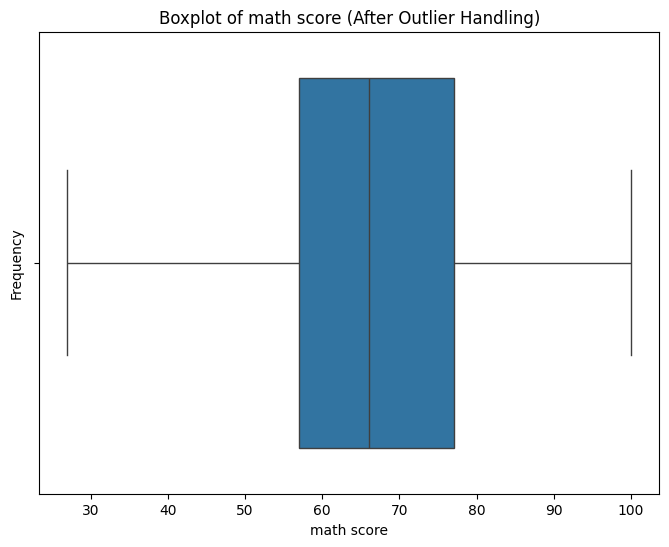

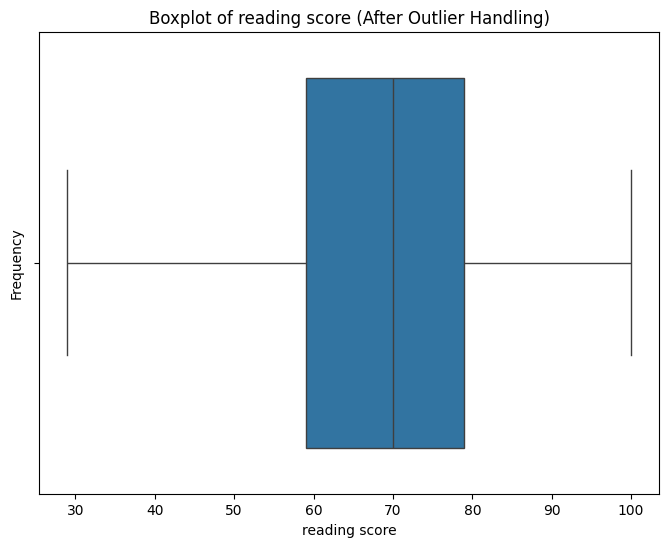

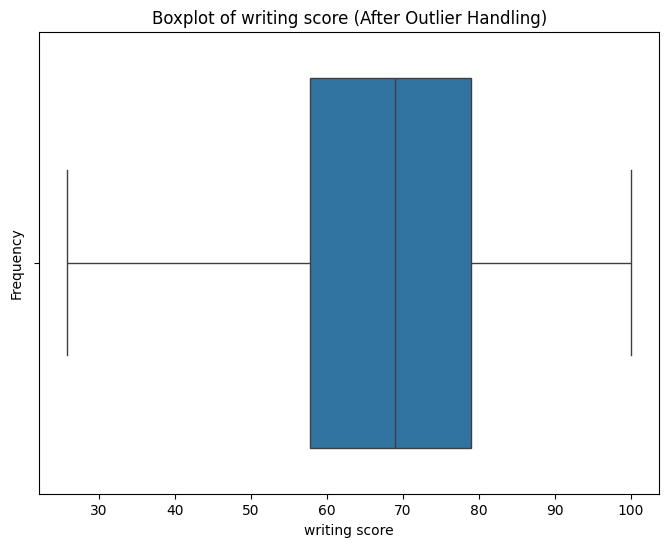

In [286]:
# Boxplot for numerical columns after outlier handling
for col in data.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, data=data)
    plt.title(f'Boxplot of {col} (After Outlier Handling)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

From the boxplot we can observe the outliers are fixed

In [287]:
#Printing the last 5 colomns
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95.0
996,male,group C,high school,free/reduced,none,62,55,55.0
997,female,group C,high school,free/reduced,completed,59,71,65.0
998,female,group D,some college,standard,completed,68,78,77.0
999,female,group D,some college,free/reduced,none,77,86,86.0


        math score  reading score  writing score
gender                                          
female   63.779923      72.640927      72.503378
male     68.728216      65.504149      63.356068


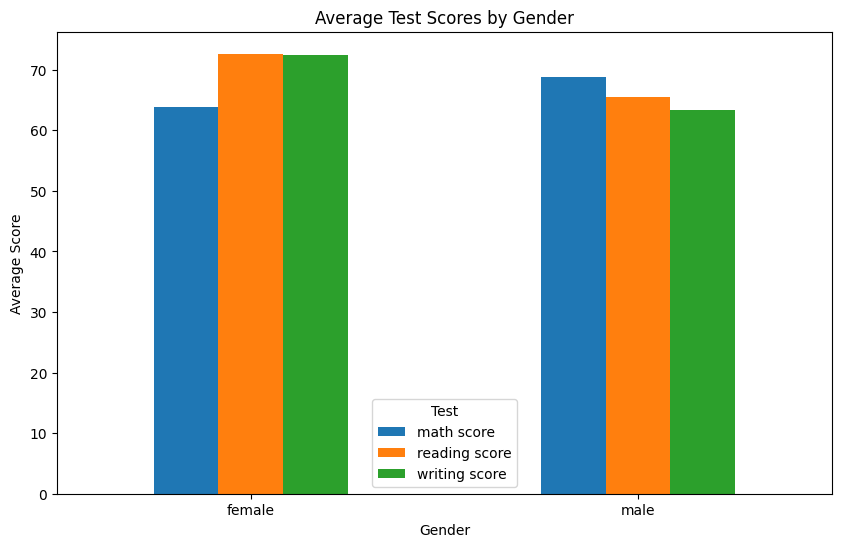

In [288]:
# Group data by gender and calculate the mean scores for math, reading, and writing
gender_scores = data.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
print(gender_scores)

# Create a bar plot to visualize the relationship
gender_scores.plot(kind='bar', figsize=(10, 6))
plt.title('Average Test Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(title='Test')
plt.show()

1. Females have high reading and writing scores compared to males
2. Male students have high math score comared to female students

                math score  reading score  writing score
race/ethnicity                                          
group A          61.629213      64.741573      62.751404
group B          63.678947      67.405263      65.672368
group C          64.564263      69.144201      67.877351
group D          67.366412      70.030534      70.145038
group E          73.821429      73.050000      71.434821


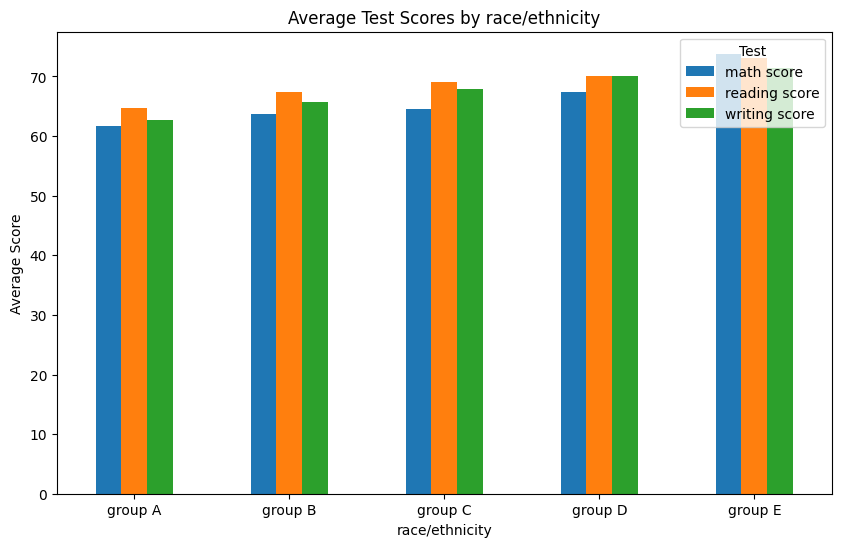

In [289]:
# Group data by gender and calculate the mean scores for math, reading, and writing
gender_scores = data.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()
print(gender_scores)

# Create a bar plot to visualize the relationship
gender_scores.plot(kind='bar', figsize=(10, 6))
plt.title('Average Test Scores by race/ethnicity')
plt.xlabel('race/ethnicity')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(title='Test')
plt.show()

From the bar graph we can observe
1. group E has highest scores in all subjects compared to other groups
2. Group A has least scores of all groups
3. group D has second best scores followed by group c and group B


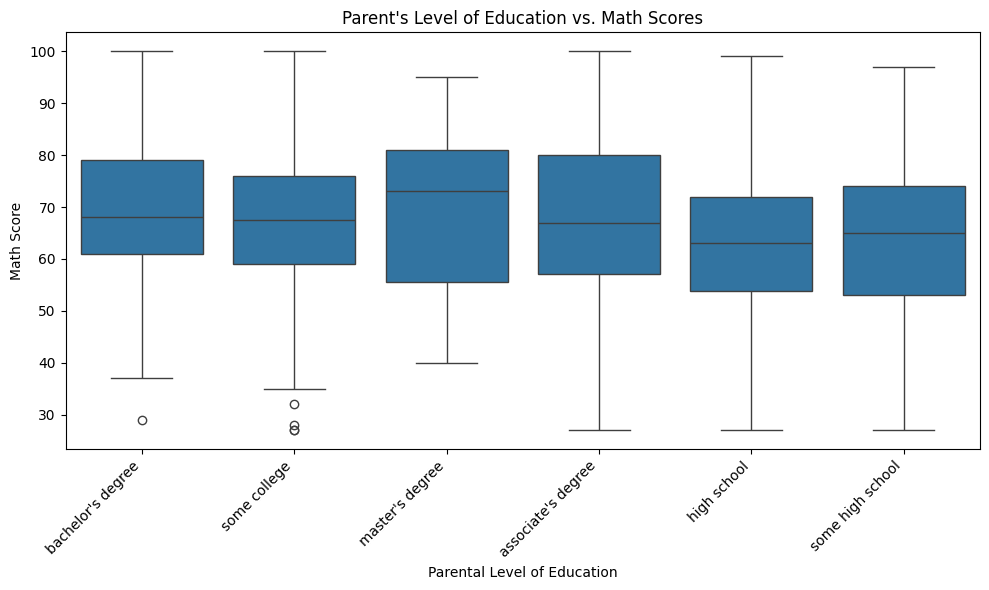

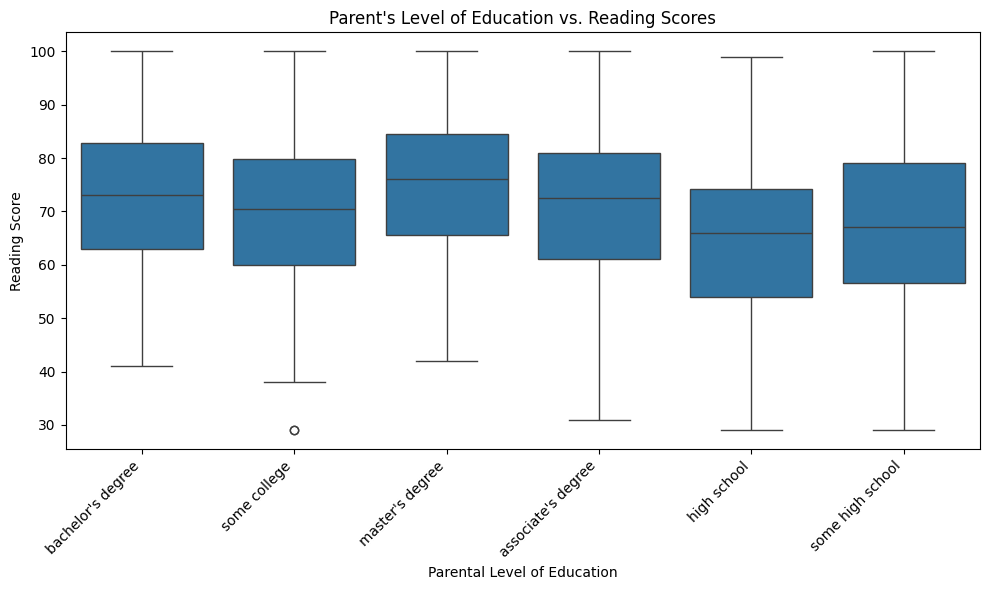

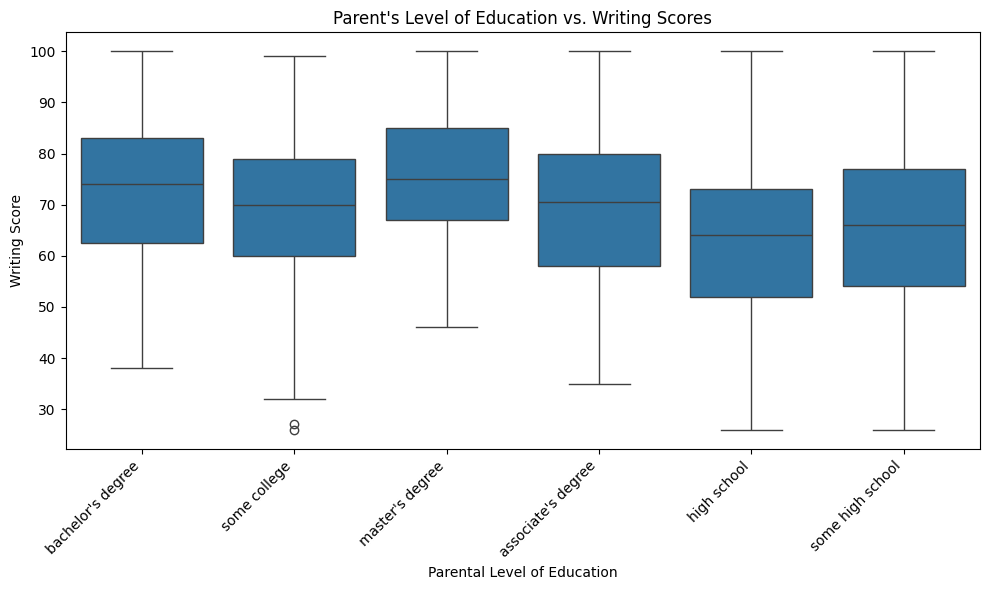

In [290]:
# parent's level of education vs mathscores , reading and writing plot reduce fig
plt.figure(figsize=(10, 6))
sns.boxplot(x='parental level of education', y='math score', data=data)
plt.title('Parent\'s Level of Education vs. Math Scores')
plt.xlabel('Parental Level of Education')
plt.ylabel('Math Score')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='parental level of education', y='reading score', data=data)
plt.title('Parent\'s Level of Education vs. Reading Scores')
plt.xlabel('Parental Level of Education')
plt.ylabel('Reading Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='parental level of education', y='writing score', data=data)
plt.title('Parent\'s Level of Education vs. Writing Scores')
plt.xlabel('Parental Level of Education')
plt.ylabel('Writing Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


1. Students with parents having master's degree have high scores in all subjects
2. students with parent's level of education high school has least scores compared to others

In [291]:
#Adding a colomn total score by avg of all scores
data['total score'] = (data['math score'] + data['reading score'] + data['writing score']) / 3

In [292]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74.0,72.666667
1,female,group C,some college,standard,completed,69,90,88.0,82.333333
2,female,group B,master's degree,standard,none,90,95,93.0,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44.0,49.333333
4,male,group C,some college,standard,none,76,78,75.0,76.333333


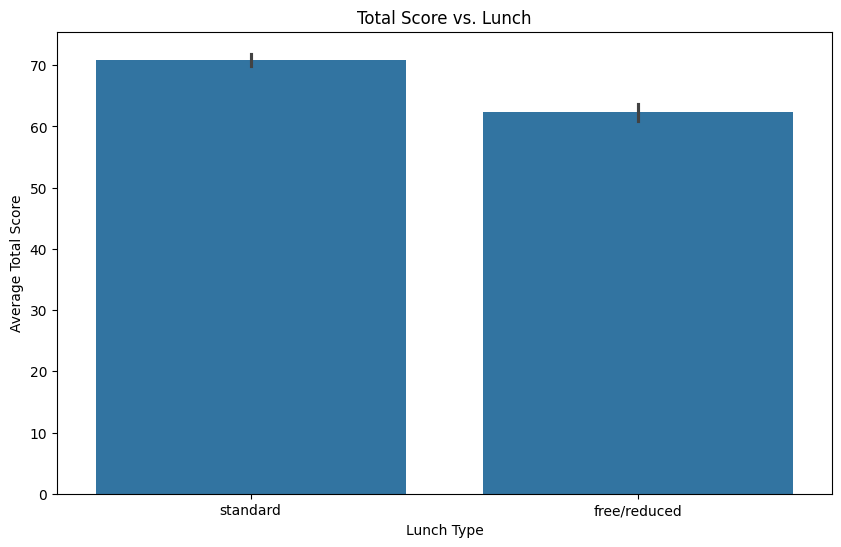

In [293]:
#barplot of Lunch vs total score
plt.figure(figsize=(10, 6))
sns.barplot(x='lunch', y='total score', data=data)
plt.title('Total Score vs. Lunch')
plt.xlabel('Lunch Type')
plt.ylabel('Average Total Score')
plt.show()

Students with standard lunch has high scores compared to free/ reduced luch type students

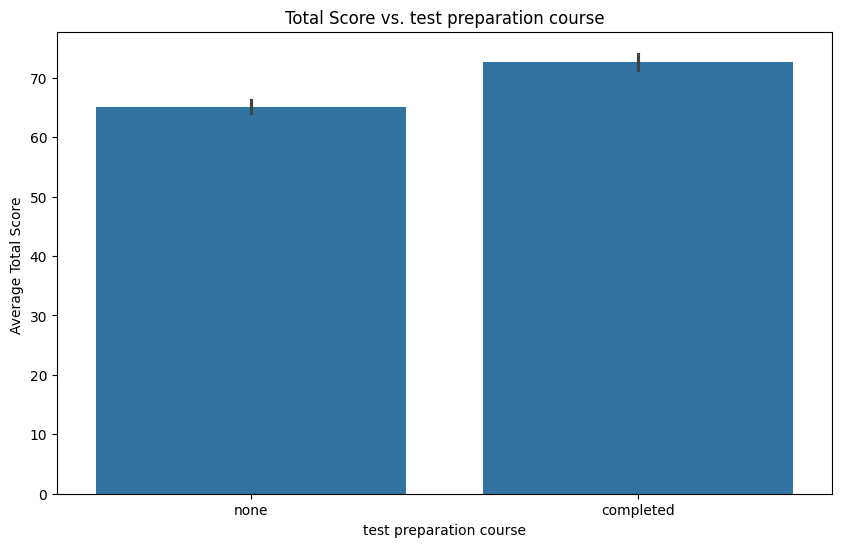

In [294]:
#barplot of Average Total Score by test preperation
plt.figure(figsize=(10, 6))
sns.barplot(x='test preparation course', y='total score', data=data)
plt.title('Total Score vs. test preparation course')
plt.xlabel('test preparation course')
plt.ylabel('Average Total Score ')
plt.show()

1. Students who have completed the test preperation course have score high marks compared to those who did not

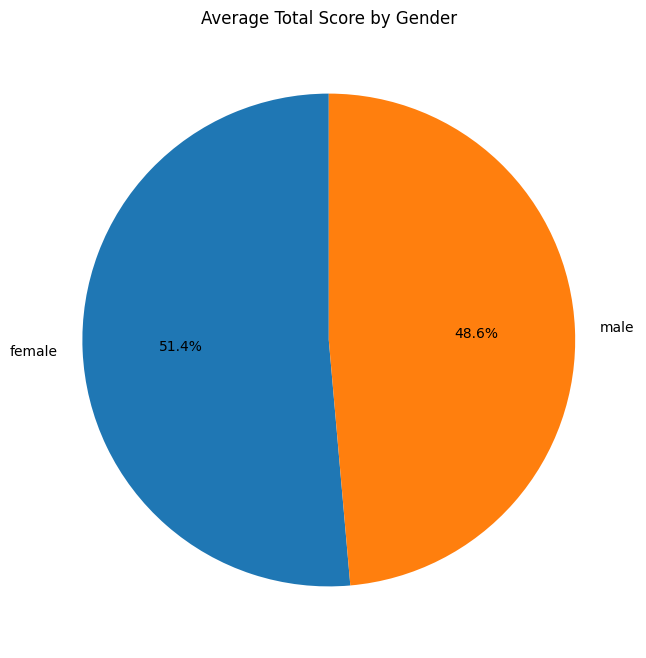

In [295]:
#piechart totalscore and gender
# Calculate the average total score for each gender
average_scores_by_gender = data.groupby('gender')['total score'].mean()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(average_scores_by_gender, labels=average_scores_by_gender.index, autopct='%1.1f%%', startangle=90)
plt.title('Average Total Score by Gender')
plt.show()

Total scores of female(51.4%) is more compared to male students 48.6%

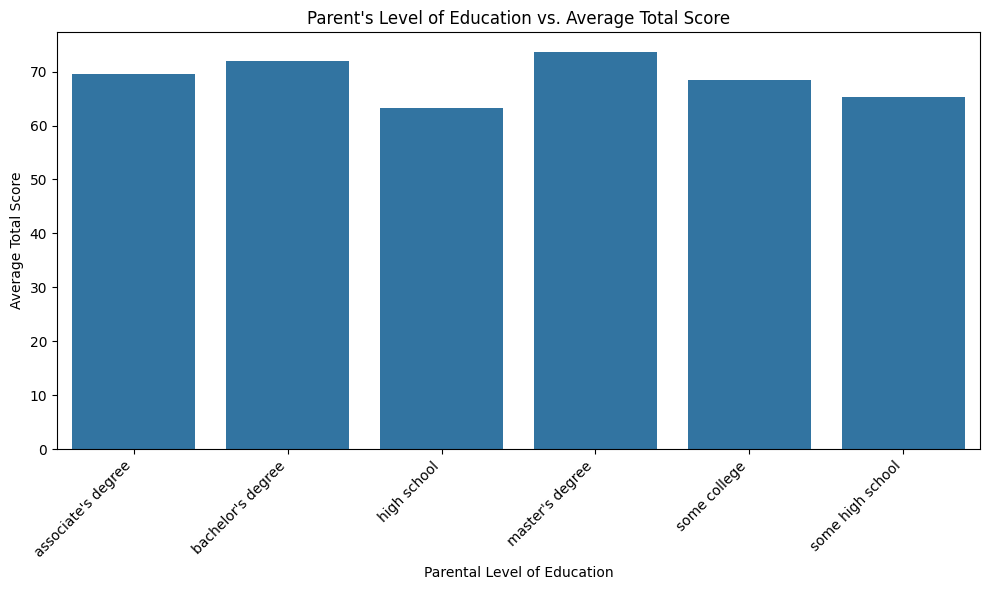

In [296]:
# Calculate the average total score for each parental level of education
average_scores_by_parental_education = data.groupby('parental level of education')['total score'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=average_scores_by_parental_education.index, y=average_scores_by_parental_education.values)
plt.title('Parent\'s Level of Education vs. Average Total Score')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Total Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The total score of student's with parent's having a masters degree is high compared to others

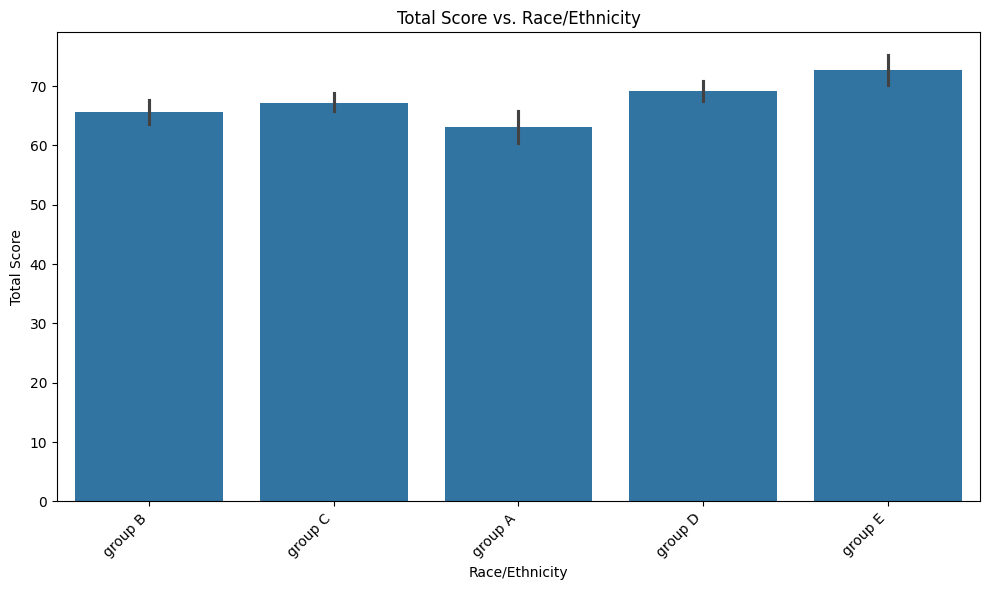

In [297]:
# baeplot for race/ethinicity vs total score plot
plt.figure(figsize=(10, 6))
sns.barplot(x='race/ethnicity', y='total score', data=data)
plt.title('Total Score vs. Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Total Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Group E students tend to have higher scores compared to other groups

In [298]:
# Create the new categories for parental level of education
def categorize_education(education_level):
    if education_level in ["master's degree", "bachelor's degree"]:
        return "Degree"
    elif education_level in ["some college", "associate's degree"]:
        return "College"
    else:
        return "High School"

data['new_parental_education_level'] = data['parental level of education'].apply(categorize_education)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,new_parental_education_level
0,female,group B,bachelor's degree,standard,none,72,72,74.0,72.666667,Degree
1,female,group C,some college,standard,completed,69,90,88.0,82.333333,College
2,female,group B,master's degree,standard,none,90,95,93.0,92.666667,Degree
3,male,group A,associate's degree,free/reduced,none,47,57,44.0,49.333333,College
4,male,group C,some college,standard,none,76,78,75.0,76.333333,College


In [299]:
# Define performance categories based on total score
def categorize_performance(total_score):
    if total_score >= 90:
        return 'Excellent'
    elif total_score >= 80:
        return 'Good'
    elif total_score >= 70:
        return 'Fair'
    else:
        return 'Poor'

# Apply the function to create the 'performance' column
data['performance'] = data['total score'].apply(categorize_performance)

# Display the updated DataFrame
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,new_parental_education_level,performance
0,female,group B,bachelor's degree,standard,none,72,72,74.0,72.666667,Degree,Fair
1,female,group C,some college,standard,completed,69,90,88.0,82.333333,College,Good
2,female,group B,master's degree,standard,none,90,95,93.0,92.666667,Degree,Excellent
3,male,group A,associate's degree,free/reduced,none,47,57,44.0,49.333333,College,Poor
4,male,group C,some college,standard,none,76,78,75.0,76.333333,College,Fair


In [300]:
# Drop the specified columns.
data = data.drop(['math score', 'reading score', 'writing score', 'parental level of education'], axis=1)

In [301]:
# Encoding Categorical Variables (0 and 1) using One-Hot Encoding
categorical_columns = ['gender', 'race/ethnicity', 'lunch', 'test preparation course', 'new_parental_education_level', 'performance']

data = pd.get_dummies(data, columns=categorical_columns, drop_first=False)  # Keep all categories

# Convert True/False values to 0 and 1 explicitly
data = data.astype(int)

# Display cleaned dataset
print(data.head())


   total score  gender_female  gender_male  race/ethnicity_group A  \
0           72              1            0                       0   
1           82              1            0                       0   
2           92              1            0                       0   
3           49              0            1                       1   
4           76              0            1                       0   

   race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
0                       1                       0                       0   
1                       0                       1                       0   
2                       1                       0                       0   
3                       0                       0                       0   
4                       0                       1                       0   

   race/ethnicity_group E  lunch_free/reduced  lunch_standard  \
0                       0                   0      

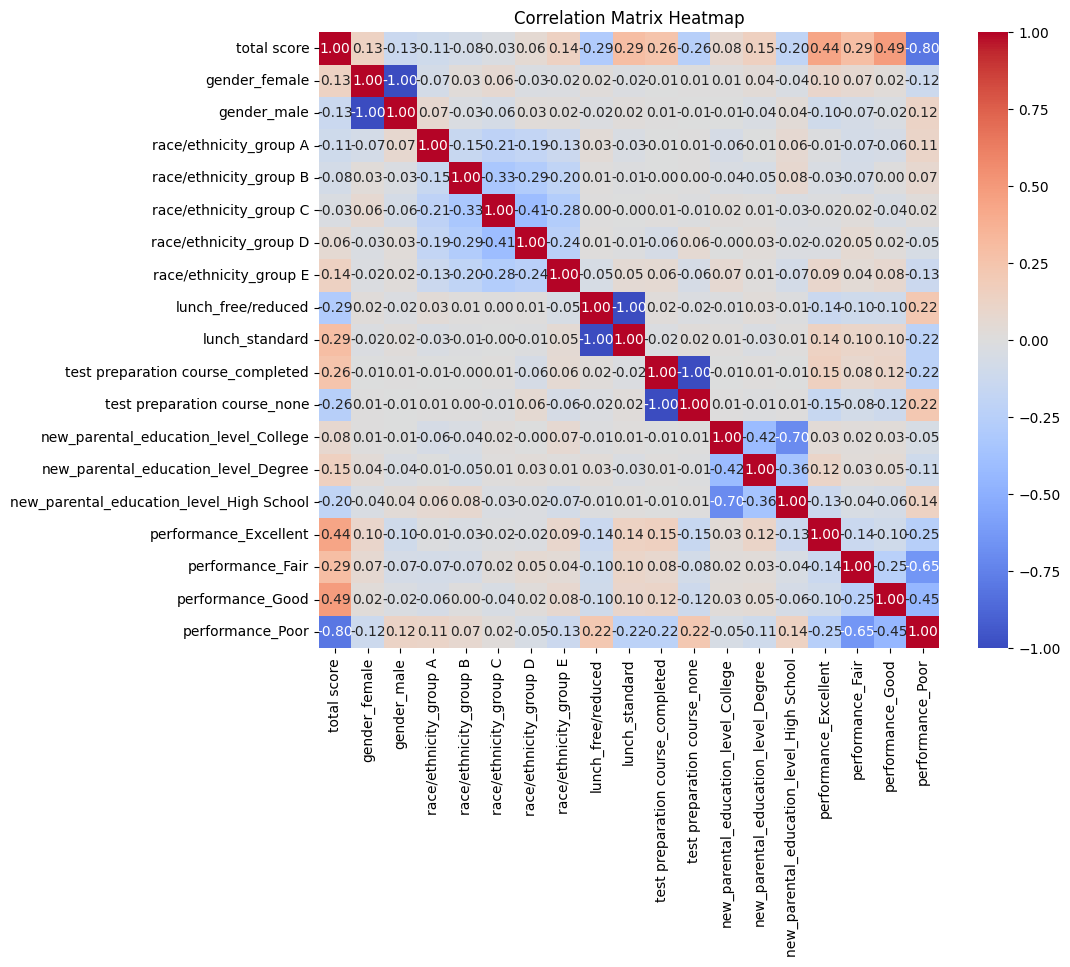

In [302]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

1. From the Heatmap we can observe total score has high positive correlation with lunch standard and testpreperation completed which is 0.29 and 0.26 respectively
2. total score has high negative correlation with lunch free/reduced and  testpreperation course none which is 0.29 and 0.26 respectively
3. Students with parents level of education as degree ,Female students and group E ethinicity students has moderate corr with scores which is 0.15,0.13, 0.14
4. More female students have excelent performace (corr is 0.10) while male students have poor performance (corr is -0.10)
5. Students with standard lunch and test prep completed has excellecnt scores ans has corr of 0.14 and 0.15 resp.

In [303]:
# printing the data values in an array
data.values


array([[72,  1,  0, ...,  1,  0,  0],
       [82,  1,  0, ...,  0,  1,  0],
       [92,  1,  0, ...,  0,  0,  0],
       ...,
       [65,  1,  0, ...,  0,  0,  1],
       [74,  1,  0, ...,  1,  0,  0],
       [83,  1,  0, ...,  0,  1,  0]])

In [304]:
#Scaling the data
array = data.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.62 1.   0.   0.   1.   0.   0.   0.   0.   1.   0.   1.   0.   1.
  0.   0.   1.   0.   0.  ]
 [0.75 1.   0.   0.   0.   1.   0.   0.   0.   1.   1.   0.   1.   0.
  0.   0.   0.   1.   0.  ]
 [0.89 1.   0.   0.   1.   0.   0.   0.   0.   1.   0.   1.   0.   1.
  0.   1.   0.   0.   0.  ]
 [0.3  0.   1.   1.   0.   0.   0.   0.   1.   0.   0.   1.   1.   0.
  0.   0.   0.   0.   1.  ]
 [0.67 0.   1.   0.   0.   1.   0.   0.   0.   1.   0.   1.   1.   0.
  0.   0.   1.   0.   0.  ]]


In [305]:
# Standardize data (0 mean, 1 stdev)
array = data.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[ 0.32  0.96 -0.96 -0.31  2.06 -0.68 -0.6  -0.4  -0.74  0.74 -0.75  0.75
  -0.9   2.16 -0.77 -0.23  1.68 -0.41 -1.09]
 [ 1.03  0.96 -0.96 -0.31 -0.48  1.46 -0.6  -0.4  -0.74  0.74  1.34 -1.34
   1.11 -0.46 -0.77 -0.23 -0.59  2.42 -1.09]
 [ 1.74  0.96 -0.96 -0.31  2.06 -0.68 -0.6  -0.4  -0.74  0.74 -0.75  0.75
  -0.9   2.16 -0.77  4.27 -0.59 -0.41 -1.09]
 [-1.31 -1.04  1.04  3.2  -0.48 -0.68 -0.6  -0.4   1.35 -1.35 -0.75  0.75
   1.11 -0.46 -0.77 -0.23 -0.59 -0.41  0.92]
 [ 0.6  -1.04  1.04 -0.31 -0.48  1.46 -0.6  -0.4  -0.74  0.74 -0.75  0.75
   1.11 -0.46 -0.77 -0.23  1.68 -0.41 -1.09]]


 So to conclude Students who have completed the test course preperation and have standard lunch type tend to have highers score which is better performance 🚀 than other students.
 \
 Also student's with parent's having a degree, female students ,group E ethinicity student's have good performance as well ✅